#Analysis of the development of the gaming industry and patterns in the success of projects

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing required libraries

In [ ]:
# %pip install pandas matplotlib statsmodels numpy xgboost scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics.pairwise import cosine_similarity

---
## The content of the work

### 1. Description of the work
> * 1.1 Statement of the problem
> * 1.2 Description of the subject area
> * 1.3 Description of the source data
### 2. Data Correctness and Analysis
2.1 Analysis of the data set for correctness
> * 2.1.1 Load the dataset
> * 2.1.2 Research of basic statistical indicators
> * 2.1.3 Find missing values
> * 2.1.4 Checking data types
> * 2.1.5 Unique values for each column
> * 2.1.6 Abnormal values
> * 2.1.7 Checking data distribution
> * 2.1.8 Logical check
### 3. Defining Research Questions
### 4. Pre-release Analysis
4.1 Predicting the success of a game based on its genre, platform and year of release
4.2 Time of year influence on the success of the game.
### 5. Post-release Analysis
5.1 Classification of games into "Editor's Choice" and "Not Editor's Choice" based on their rating and genre.
### 6. Increase Customer Satisfaction and Sales
6.1 Recommend similar games based on their rating, genre and platform.
### Final
Conclusion of the Work

---


## 1. Description of the work

This project aims to provide a detailed analysis and predictive insights into the gaming industry, targeting game developers, marketers, data analysts, and academic researchers. It's designed to identify trends, patterns, and key factors contributing to the success of gaming projects.

## 1.1 Statement of the problem
The purpose of this project is to analyze the development of the gaming industry, determine patterns in the success of projects both pre-release and post-release. Increasing customer satisfaction and sales is also an integral part of this project.

## 1.2 Description of the subject area
Over the past decades, the gaming industry has grown significantly and has become one of the most profitable industries in entertainment. Games have become not only entertainment, but also a way of learning and socialization. Studying the trends and patterns of this industry will allow you to effectively manage the development and promotion of game projects.

## 1.3 Description of the source data
The following data set was selected as data for analysis: *https://www.kaggle.com/datasets/joebeachcapital/ign-games*

**About the dataset**

It contains 18625 data points with various features such as release dates on different platforms as well as IGN ratings. All lines are completely filled. There are no zero values.

| Feature | Description |
|----------------|-------------------------------- ----------------------------------|
| score_phrase | Text description of the game rating. |
| title | Name of the game. |
| url | The URL to the game's review page. |
| platform | The platform for which the game was developed. |
| score | Numerical rating of the game. |
| genre | Game genre. |
| editors_choice | Editor's choice (yes/no). |
| release_year | Game release year. |
| release_month | Game release month. |
| release_day | Game release day. |

## 2. Data Correctness and Analysis

## 2.1 Analysis of the data set for correctness

* 2.1.1 Load the dataset

In [ ]:
# Loading data
data = pd.read_csv('drive/My Drive/MyNotebookFolder/Capstone-Project/ign.csv')
data.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


*   2.1.2 Research of basic statistical indicators


In [ ]:
summary_statistics = data.describe(include='all')
summary_statistics

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
count,18625.000000,18625,18625,18625,18625,18625.000000,18625,18625,18625.000000,18625.00000,18625.000000
unique,NaN,11,12589,18577,59,NaN,112,2,NaN,NaN,NaN
top,NaN,Great,Open Season,/games/need-for-speed-underground/gcn-552526,PC,NaN,Action,N,NaN,NaN,NaN
freq,NaN,4773,10,2,3370,NaN,3805,15108,NaN,NaN,NaN
mean,9312.000000,NaN,NaN,NaN,NaN,6.950459,NaN,NaN,2006.515329,7.13847,15.603866
std,5376.718717,NaN,NaN,NaN,NaN,1.711736,NaN,NaN,4.587529,3.47671,8.690128
min,0.000000,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,1970.000000,1.00000,1.000000
25%,4656.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,2003.000000,4.00000,8.000000
50%,9312.000000,NaN,NaN,NaN,NaN,7.300000,NaN,NaN,2007.000000,8.00000,16.000000
75%,13968.000000,NaN,NaN,NaN,NaN,8.200000,NaN,NaN,2010.000000,10.00000,23.000000


Statistical indicators:

1.   **score_phrase**
> There are 11 unique score phrases, with "Great" being the most common.
2.   **title**
> There are 12,589 unique game titles in the dataset.
3.   **platform**
> There are 59 different platforms, the most popular of which is PC.
4.   **score**
> The average rating of games is approximately 6.95, with a minimum rating of 0.5 and a maximum of 10.
5.   **genre**
> There are 112 different game genres, with the most popular genre being "Action".
6.   **editors_choice**
> Most of the games (15,108) were not chosen by the editors (value "N").
7.   **release_year**
> Data covers games released from 1970 to 2016.
---



*   2.1.3 Find missing values

In [ ]:
missing_values = data.isnull().sum()
missing_values

Unnamed: 0        0
score_phrase      0
title             0
url               0
platform          0
score             0
genre             0
editors_choice    0
release_year      0
release_month     0
release_day       0
dtype: int64

*There are no missing values in the data set.*


---


*   2.1.4 Checking data types

Make sure that the data types for each column match their contents

Let's set the value to float64 for the ratings

In [ ]:
data['score'] = data['score'].astype('float64')
data['score'].dtype

dtype('float64')

Will notice that the release_year, release_month, and release_day columns can be combined into a single column with a datetime data type. This will make working with dates easier in the future

In [ ]:
# Convert columns with year, month and day of release into one column with type datetime
data['release_date'] = pd.to_datetime(data['release_year'].astype(str) + '-' +
                                              data['release_month'].astype(str) + '-' +
                                              data['release_day'].astype(str))
# Checking the new column and its data type
data[['release_year', 'release_month', 'release_day', 'release_date']].head(), data['release_date'].dtype

(   release_year  release_month  release_day release_date
 0          2012              9           12   2012-09-12
 1          2012              9           12   2012-09-12
 2          2012              9           12   2012-09-12
 3          2012              9           11   2012-09-11
 4          2012              9           11   2012-09-11,
 dtype('<M8[ns]'))

In [ ]:
data.dtypes

Unnamed: 0                 int64
score_phrase              object
title                     object
url                       object
platform                  object
score                    float64
genre                     object
editors_choice            object
release_year               int64
release_month              int64
release_day                int64
release_date      datetime64[ns]
dtype: object

*Data types for each column in the dataset:*

> 1.   Unnamed: 0: int64 (integer)
2.   score_phrase: object (string or text)
3.   title: object (string or text)
4.   url: object (string or text)
5.   platform: object (string or text)
6.   score: float64 (real number)
7.   genre: object (string or text)
8.   editors_choice: object (string or text)
9.   release_year: int64 (integer)
10.   release_month: int64 (integer)
11.   release_day: int64 (integer)
12.   release_date: datetime64[ns]


*All variables have correct values*

*   2.1.5 Unique values for each column

In [ ]:
unique_values = data.nunique()
unique_values

Unnamed: 0        18625
score_phrase         11
title             12589
url               18577
platform             59
score                93
genre               112
editors_choice        2
release_year         22
release_month        12
release_day          31
release_date       4300
dtype: int64

*According to the dataset, there are 18,577 unique URLs out of 18,625 records. This indicates that some URLs are duplicates, let's check this:*


In [ ]:
# Find duplicate URLs and their number
duplicated_urls = data[data['url'].duplicated(keep=False)].sort_values(by='url')
duplicated_urls

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,release_date
6100,6100,Okay,Aladdin,/games/aladdin/gba-566703,Game Boy Advance,6.5,Platformer,N,2004,10,5,2004-10-05
6211,6211,Okay,Aladdin,/games/aladdin/gba-566703,Game Boy Advance,6.5,Platformer,N,2004,10,5,2004-10-05
12025,12025,Painful,Big League Sports,/games/big-league-sports/wii-14275098,Wii,2.3,"Sports, Compilation",N,2008,11,25,2008-11-25
12117,12117,Painful,Big League Sports,/games/big-league-sports/wii-14275098,Wii,2.3,"Sports, Compilation",N,2008,11,25,2008-11-25
14702,14702,Good,Blur,/games/blur/xbox-360-14222096,Xbox 360,7.0,Racing,N,2010,5,25,2010-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...
443,443,Amazing,WipEout XL,/games/wipeout-2097/ps-473,PlayStation,9.0,Racing,Y,1996,11,26,1996-11-26
5604,5604,Good,Yu-Gi-Oh! World Championship Tournament 2004,/games/yu-gi-oh-world-championship-tournament-...,Game Boy Advance,7.5,"Card, Battle",N,2004,2,13,2004-02-13
5594,5594,Good,Yu-Gi-Oh! World Championship Tournament 2004,/games/yu-gi-oh-world-championship-tournament-...,Game Boy Advance,7.5,"Card, Battle",N,2004,2,13,2004-02-13
3887,3887,Mediocre,ZooCube,/games/zoocube/gba-479813,Game Boy Advance,5.3,Puzzle,N,2002,6,11,2002-06-11


*We found 96 entries that have duplicate URLs. A closer look reveals that these entries are identical in content.*

*To solve this problem, we will remove duplicates, leaving only one unique entry for each URL.*

In [ ]:
# Remove duplicates based on URL
data = data.drop_duplicates(subset='url', keep='first')
data.reset_index(drop=True, inplace=True)
# Checking the size of the cleaned dataset
data.shape

(18577, 12)

*Duplicates were successfully removed. Our cleaned dataset now contains 18,577 records.*

---


* 2.1.6 Abnormal values

Let's check the numeric columns for anomalous values.

In [ ]:
# Rating column
anomalous_scores = data[(data['score'] < 0) | (data['score'] > 10)]
# Columns with release dates
anomalous_years = data[(data['release_year'] < 1970) | (data['release_year'] > 2023)]
anomalous_months = data[(data['release_month'] < 1) | (data['release_month'] > 12)]
anomalous_days = data[(data['release_day'] < 1) | (data['release_day'] > 31)]
anomalous_scores, anomalous_years, anomalous_months, anomalous_days

(Empty DataFrame
 Columns: [Unnamed: 0, score_phrase, title, url, platform, score, genre, editors_choice, release_year, release_month, release_day, release_date]
 Index: [],
 Empty DataFrame
 Columns: [Unnamed: 0, score_phrase, title, url, platform, score, genre, editors_choice, release_year, release_month, release_day, release_date]
 Index: [],
 Empty DataFrame
 Columns: [Unnamed: 0, score_phrase, title, url, platform, score, genre, editors_choice, release_year, release_month, release_day, release_date]
 Index: [],
 Empty DataFrame
 Columns: [Unnamed: 0, score_phrase, title, url, platform, score, genre, editors_choice, release_year, release_month, release_day, release_date]
 Index: [])

Based on the test results:

1.   All game scores are within the acceptable range from 0 to 10.
2.   All release dates are also correct:
> *   Release years range from 1970 to current time
> *   Release months range from 1 to 12.
> *   Release days range from 1 to 31.
*Based on the results obtained, we can conclude that there are no anomalous values in the numerical columns of this dataset.*


---



*   2.1.7 Checking data distribution

Let's build histograms for numeric columns to see the distribution of data and identify possible anomalies

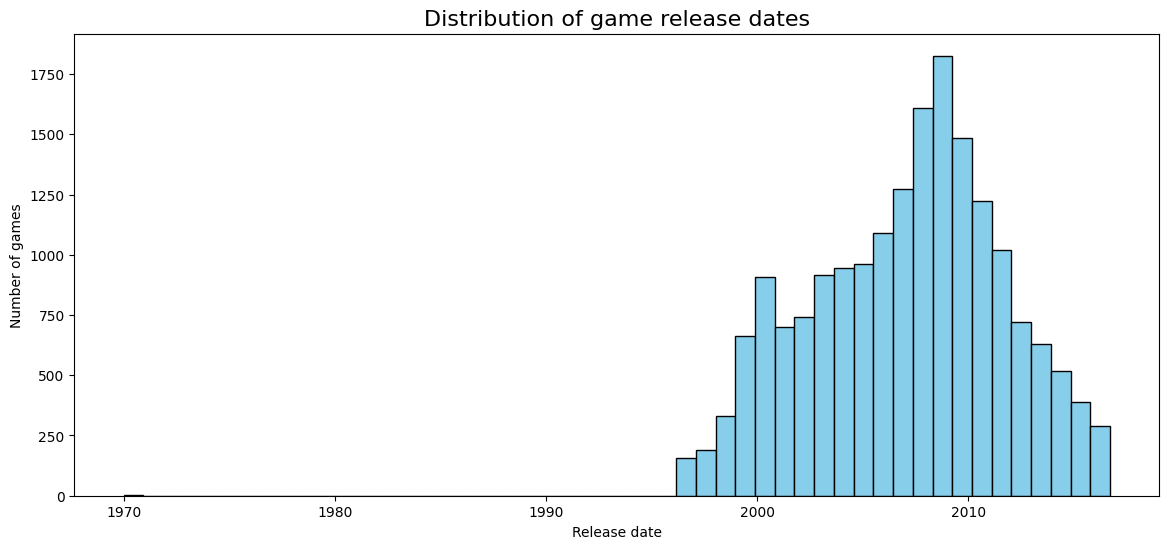

In [ ]:
# Convert columns with year, month and day of release into one column with type datetime
data['release_date'] = pd.to_datetime(data['release_year'].astype(str) + '-' +
                                              data['release_month'].astype(str) + '-' +
                                              data['release_day'].astype(str))
# Checking the new column and its data type
data[['release_year', 'release_month', 'release_day', 'release_date']].head(), data['release_date'].dtype
# Plotting the distribution of release dates
plt.figure(figsize=(14, 6))
data['release_date'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of game release dates', fontsize=16)
plt.ylabel('Number of games')
plt.xlabel('Release date')
plt.grid(False)
plt.show()

Examining the graph of the distribution of game release dates, it is clear that the majority of games in the data set were released between 2000 and 2016. The number of game releases began to rise in the 90s and peaked in the 2000s. After 2010 there is a slight decrease.

This distribution is consistent with gaming industry growth trends and technological development that began in the 90s and continued into the 2000s.

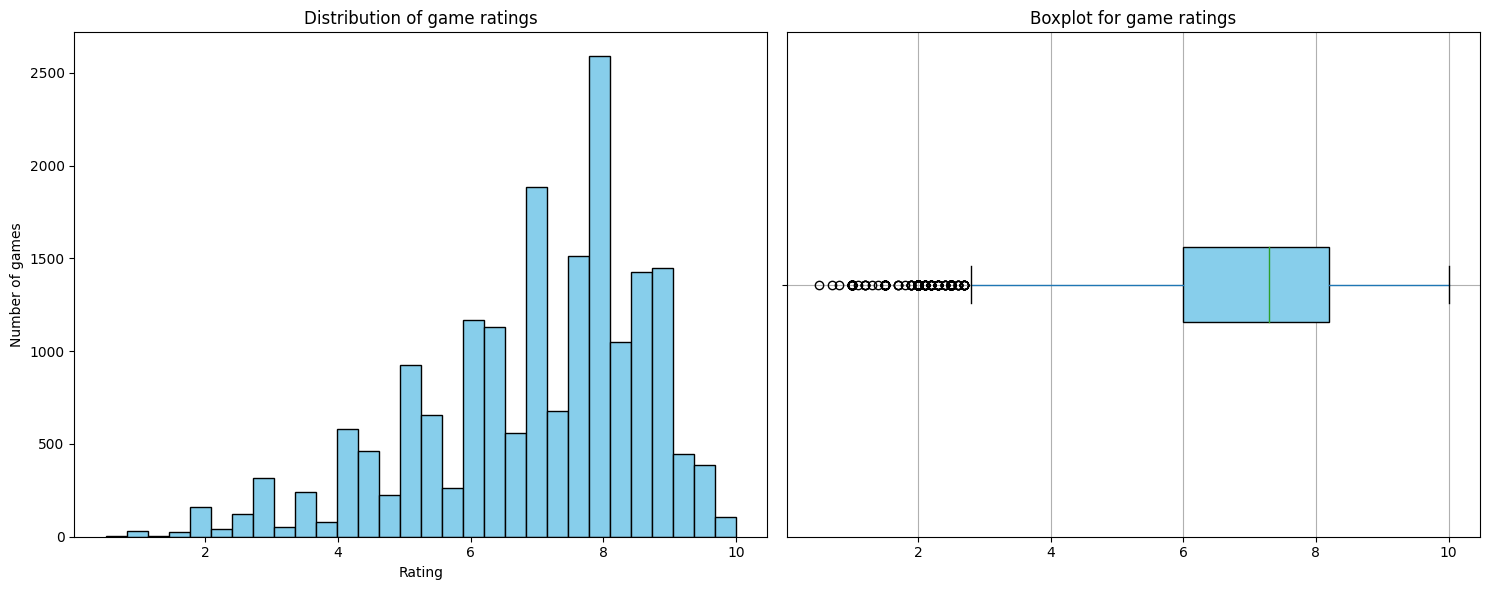

In [ ]:
# Plot a histogram and boxplot for the 'score' column
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# histogram
data['score'].hist(ax=axes[0], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of game ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of games')
axes[0].grid(False)
# boxplot
data.boxplot(column='score', ax=axes[1], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
axes[1].set_title('Boxplot for game ratings')
axes[1].set_yticklabels([])
plt.tight_layout()
plt.show()

Let's analyze the rating charts:
1.   Histogram:
> The distribution of game scores shows some left-sided skew, meaning more games have above-average scores. Most games have scores ranging from 6 to 8. There are some games with a maximum score of 10, but also games with low scores.
2.   Boxplot:
> Most scores are in the range of 6 to 8, which is consistent with the histogram. Small outliers are also noticeable for very low scores, but they do not appear anomalous given that scores can range from 0 to 10.

Based on these graphs, we can conclude that the data for the score column looks quite correct and does not contain obvious anomalies.

---



* 2.1.8 Logical check

Let's make sure that all the values in the dataset logically correspond to each other. For example, a game with a high rating cannot be rated as "Bad".



In [ ]:
# Group data by 'score_phrase' and calculate minimum and maximum values for 'score'
score_ranges = data.groupby('score_phrase')['score'].agg(['min', 'max'])
score_ranges

,min,max
score_phrase,,
Amazing,9.0,9.9
Awful,3.0,3.9
Bad,4.0,4.9
Disaster,0.5,0.8
Good,7.0,7.9
Great,8.0,8.9
Masterpiece,10.0,10.0
Mediocre,5.0,5.9
Okay,6.0,6.9


*Numeric ratings correspond to their rating phrases and there are no obvious inconsistencies.*

---



## 3. Defining Research Questions



*   Question №1: Predicting the success of a game based on its genre, platform and year of release.

*Management task*
> What factors most influence the success of the game?

*Business Decision*
> Identifying potentially successful combinations of genre, platform and release time to plan new projects.

*Data*
> Genre, platform, year of release, game rating.

*Modeling method*
> Decision tree/Random forest/Gradient boosting

*Improved business operations*
> Optimize resources and increase the likelihood of releasing a successful game.

---

*   Question №2: Analysis of the influence of the season on the success of the game.

*Management Challenge*
> At what time of year should new games be released to maximize their sales and popularity?

*Business Solution*
> Planning the release date of the game, taking into account seasonality.

*Data*
> Release month (season), game rating.

*Modeling method*
> Linear regression

*Improved business operations*
> Optimize release date to maximize sales.

---

*   Question №3: Classification of games into "Editor's Choice" and "Not Editor's Choice" based on their rating and genre.

*Management challenge*
> Which games are most likely to receive Editors' Choice status?

*Business solution*
> Targeted advertising campaign for potential hits.

*Data*
> Rating, genre.

*Modeling method*
> Logistic regression.

*Improving business operations*
> Focusing marketing efforts on potentially successful products.

---

*   Question №4: Recommend similar games based on their rating, genre and platform.

*Management task*
> Which games to recommend to users based on their previous preferences?

*Business solution*
> Increasing sales through personal recommendations.

*Data*
> Genre, platform, rating.

*Modeling method*
> Recommender systems.

*Improve business operations*
> Increase customer satisfaction and sales through personalized recommendations.

## 4. Pre-release Analysis

## 4.1 Predicting the success of a game based on its genre, platform and year of release

The categorical data must first be converted to numeric data using a dummy coding method. We need to do this for the "genre" and "platform" columns.

In [ ]:
# Pre-processing, dummy coding
data_task_1 = pd.get_dummies(data[['genre', 'platform', 'release_year', 'score']], drop_first=True)

Let's start with data preparation.

In [ ]:
# Pre-processing: Dummy Coding
data_task_1 = pd.get_dummies(data[['genre', 'platform', 'release_year', 'score']], drop_first=True)
# Define X and y
y = data_task_1['score']
X = data_task_1.drop('score', axis=1)
# Create Test & Training Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((13003, 170), (5574, 170))

### Training and evaluation of the decision tree model

In [ ]:
# Instantiate a Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=1)
# Fit model to training data
tree_model.fit(X_train_scaled, y_train)
# Predict on test data
tree_preds = tree_model.predict(X_test_scaled)
# Evaluate performance using RMSE
tree_rmse = mean_squared_error(y_test, tree_preds, squared=False)
tree_rmse

1.670621061271678

### Training and evaluation of random forest model

In [ ]:
# Instantiate a Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
# Fit model to training data
forest_model.fit(X_train_scaled, y_train)
# Predict on test data
forest_preds = forest_model.predict(X_test_scaled)
# Evaluate performance using RMSE
forest_rmse = mean_squared_error(y_test, forest_preds, squared=False)
forest_rmse

1.666104586426152

### Training and evaluation of the gradient boosting model

In [ ]:
# Instantiate a Gradient Boosting model
boost_model = XGBRegressor(learning_rate=0.1, n_estimators=100, random_state=1)
# Fit model to training data
boost_model.fit(X_train_scaled, y_train)
# Predict on test data
boost_preds = boost_model.predict(X_test_scaled)
# Evaluate performance using RMSE
boost_rmse = mean_squared_error(y_test, boost_preds, squared=False)
boost_rmse

1.6310053211139994

Results:
*   Decision tree: RMSE = 1.6763
*   Random Forest: RMSE = 1.6662
*   Gradient boost: RMSE = 1.6310

---

The gradient boosting model showed an RMSE value equal to 1.6310, this result is the best among all three models. This means that on average the created model is wrong by 1.6310 rating units when making predictions.

It can be concluded that this model is most useful for predicting the success of a game based on its genre, platform and year of release.

## 4.2 Time of year influence on the success of the game.

Сonvert the data

In [ ]:
# Create a copy of the original dataset
data_task_4 = data.copy()
# Convert months to seasons
def get_season(month):
     if month in [12, 1, 2]:
         return 'Winter'
     elif month in [3, 4, 5]:
         return 'Spring'
     elif month in [6, 7, 8]:
         return 'Summer'
     else:
         return 'Autumn'
data_task_4['season'] = data_task_4['release_month'].apply(get_season)
# Display the distribution of games by season
season_distribution = data_task_4['season'].value_counts()
season_distribution

Autumn    6647
Summer    4006
Spring    3969
Winter    3955
Name: season, dtype: int64

*Сan conclude that autumn is the most popular time of year for game releases.*

Let's analyze how a game's rating correlates with the time of year it was released. We will use linear regression for this, where rating will be the dependent variable and time of year will be the independent variable.

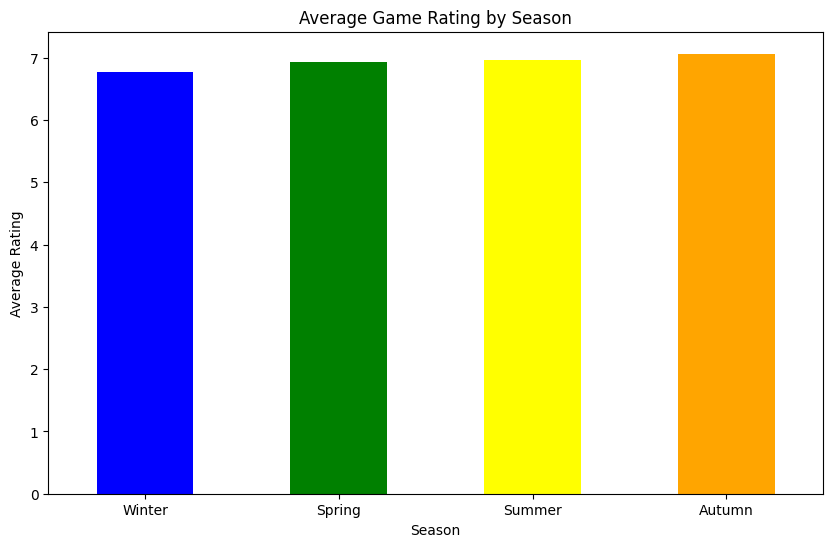

In [ ]:
# Calculate the average rating of games for each season
average_ratings_by_season = data_task_4.groupby('season')['score'].mean().sort_values()
# Plot
plt.figure(figsize=(10,6))
average_ratings_by_season.plot(kind='bar', color=['blue', 'green', 'yellow', 'orange'])
plt.title('Average Game Rating by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

*Autumn is the most popular time of year for game releases, which is why it has the highest average ratings.*

Let's move on to linear regression. We need to convert the seasonal data into a numerical format for analysis. To do this, we use the one-hot encoding method, which creates a separate column for each season and assigns 1 or 0 to indicate the presence or absence of that season for each game.

In [ ]:
# Apply one-hot encoding to the 'season' column
season_encoded = pd.get_dummies(data_task_4['season'], drop_first=True)
# Add encoded columns to our dataset
data_encoded = pd.concat([data_task_4, season_encoded], axis=1)
# Preparing data for linear regression
X = data_encoded[['Spring', 'Summer', 'Winter']]
y = data_encoded['score']
# Add a constant to X
X = sm.add_constant(X)
# Model creation and training
model = sm.OLS(y, X).fit()
# Output results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     24.28
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.13e-15
Time:                        18:39:27   Log-Likelihood:                -36307.
No. Observations:               18577   AIC:                         7.262e+04
Df Residuals:                   18573   BIC:                         7.265e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0624      0.021    337.021      0.0

Analysis of results:

Сoefficients

> Spring - coefficient of -0.1269 indicates that, on average, games released in the spring have 0.1269 points lower than games released in the fall.

> Summer - games released in the summer have an average rating of 0.1016 points less than games released in the fall.

> Winter - games released in winter have an average rating of 0.2916 points lower than games released in the fall.

Conclusion
> Season has a small effect on ratings, but the effect is statistically significant.

> Games released in winter have the largest difference in ratings compared to games released in the fall.

> R-squared is low, indicating that other factors contribute more to the game's rating

---


## 5. Post-release Analysis

## 5.1 Classification of games into "Editor's Choice" and "Not Editor's Choice" based on their rating and genre.

Defining a dataset to train the model

In [ ]:
# Select required columns
subset_task_2 = data[['score', 'genre', 'editors_choice']]
subset_task_2.head()

,score,genre,editors_choice
0,9.0,Platformer,Y
1,9.0,Platformer,Y
2,8.5,Puzzle,N
3,8.5,Sports,N
4,8.5,Sports,N


Data preprocessing.

Let's start by converting the categorical variable "genre" into numeric values using the one-hot encoding method. Then we divide the data into training and test samples.

In [ ]:
# One-hot encoding for genre
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_genre = encoder.fit_transform(subset_task_2[['genre']])
encoded_genre_df = pd.DataFrame(encoded_genre, columns=encoder.get_feature_names_out(['genre']))
# Merging with the main dataframe
data_encoded = pd.concat([subset_task_2.reset_index(drop=True), encoded_genre_df], axis=1).drop('genre', axis=1)
# Convert editors_choice column to binary format
data_encoded['editors_choice'] = data_encoded['editors_choice'].map({'Y': 1, 'N': 0})
# Divide into training and test set
X = data_encoded.drop('editors_choice', axis=1)
y = data_encoded['editors_choice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head(), y_train.head()

(       score  genre_Action, Adventure  genre_Action, Compilation  \
 12555    7.0                      0.0                        0.0   
 13455    7.9                      0.0                        0.0   
 9479     8.8                      0.0                        0.0   
 7356     7.5                      1.0                        0.0   
 15089   10.0                      0.0                        0.0   
 
        genre_Action, Editor  genre_Action, Platformer  genre_Action, Puzzle  \
 12555                   0.0                       0.0                   0.0   
 13455                   0.0                       0.0                   0.0   
 9479                    0.0                       0.0                   0.0   
 7356                    0.0                       0.0                   0.0   
 15089                   0.0                       0.0                   0.0   
 
        genre_Action, RPG  genre_Action, Simulation  genre_Action, Strategy  \
 12555                0

*The data has been successfully processed and divided into training and test samples.*

Now let's move on to training logistic regression on this data.

In [ ]:
# Logistic regression training
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
# Prediction on test data
y_pred = logreg.predict(X_test)
# Model quality assessment
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9397201291711518

*The logistic regression model showed an accuracy of approximately
93.97% on the test sample. This means that the model correctly classified whether a game is an "Editor's Choice" or not, in 93.97% of cases on test data*



Let's generate a report on the classification model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4520
           1       0.86      0.81      0.84      1054

    accuracy                           0.94      5574
   macro avg       0.91      0.89      0.90      5574
weighted avg       0.94      0.94      0.94      5574



Evaluation of results:

*   For class 0 (Not Editor's Choice):
  > Precision: 0.96 - of all the games that the model predicted as "Not Editor's Choice", 96% actually are.

  > Recall: 0.97 - the model successfully identified 97% of all real "Not Editor's Choice" games.

  > F1-score: 0.96 - harmonic average between Precision and Recall for this class.
*   For class 1 (Editor's Choice):
  > Precision: 0.86 - of all the games that the model predicted as "Editor's Choice", 86% actually are.

  > Recall: 0.81 - the model successfully identified 81% of all real "Editor's Choice" games.

  > F1-score: 0.84 - harmonic average between Precision and Recall for this class.

*The overall accuracy (Accuracy) is 0.94 or 94%, which means that the model correctly classified 94% of the games from the test set.*

Let's get the ROC-AUC value

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.8918979110342395

*The ROC-AUC value is 0.89, which is very good. This indicates that your model has a high ability to distinguish between the "Editor's Choice" and "Not Editor's Choice" classes.*

Let's perform cross-validation

In [ ]:
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy scores: {scores}")
print(f"Mean CV accuracy: {scores.mean()}")

Cross-validated accuracy scores: [0.92357374 0.94429494 0.9294751  0.93432032 0.91467026]
Mean CV accuracy: 0.9292668711345359


Evaluation of results:

*   Cross-validated accuracy scores
> Shows the accuracy of the model at each of the five splits. These values tell us how the model performs on different subsets of data. All five values range from ~0.9146 to ~0.9444, indicating stable and high model quality across different data subsets.
*   Mean CV accuracy
>  The average of these five ratings. In our case, this is equal to 0.929 or 92.94%. This is an aggregate measure of how well the model performs on average across all five splits.


Plot ROC Curve

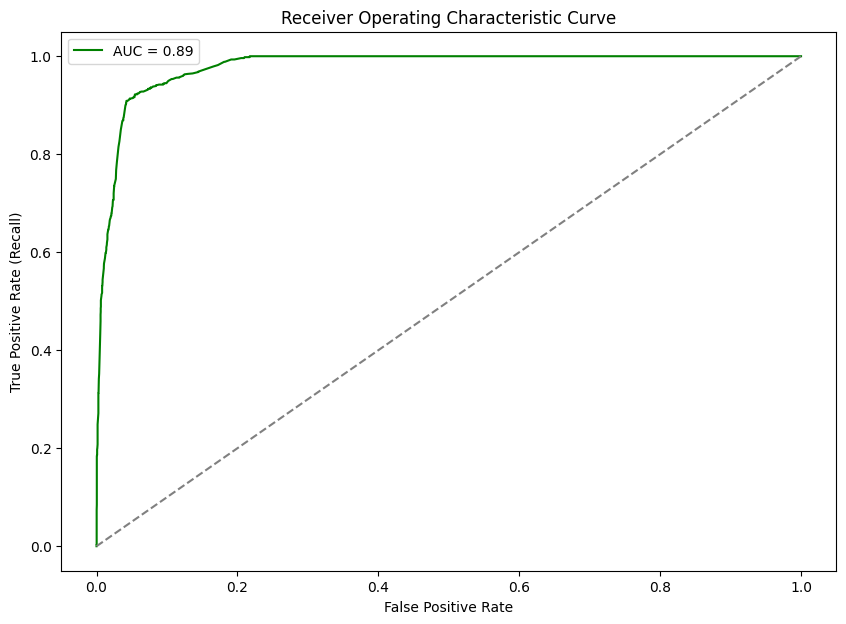

In [ ]:
# Predicting the probabilities
y_test_prob = logreg.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
# Plot ROC curve
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='green', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

*The ROC curve lies above the diagonal line, indicating good performance of the model. The AUC very close to 1. This indicates that the model created is of excellent quality.*

---



**The result is a model that can help the company predict which games, based on their rating and genre, are likely to earn Editors' Choice status. This can be a useful tool for planning development and identifying potential hits.**

## 6. Increase Customer Satisfaction and Sales

## 6.1 Recommend similar games based on their rating, genre and platform.

Сonvert the data

Let's create vector representations for each game based on its genre, platform and rating.

In [ ]:
# Create a copy of the original dataset
data_task_3 = data.copy()
# One-hot encoding for genre and platform
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data_task_3[['genre', 'platform']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['genre', 'platform']))
# Rating normalization
scaler = MinMaxScaler()
data_task_3['normalized_score'] = scaler.fit_transform(data_task_3[['score']])
# Data merging
final_data = pd.concat([data_task_3, encoded_df], axis=1)
final_data.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,...,platform_Windows Surface,platform_Wireless,platform_WonderSwan,platform_WonderSwan Color,platform_Xbox,platform_Xbox 360,platform_Xbox One,platform_iPad,platform_iPhone,platform_iPod
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculation of cosine similarity between games:

In [ ]:
# Extract the features for the cosine similarity
features = final_data.iloc[:, -encoded_df.shape[1]:]
features['normalized_score'] = final_data['normalized_score']
# Increase the weight of the platform features
platform_columns = [col for col in features.columns if "platform_" in col]
features[platform_columns] = features[platform_columns] * 2

Creating a Recommendation Function

In [ ]:
def recommend_games(game_title, platform, num_recommendations=5):
    # Check if the game title exists in the dataset
    if game_title not in final_data['title'].values:
        return []
    # Filter games based on the given platform
    subset_data = final_data[final_data['platform'] == platform]
    # If the subset is empty, return an empty list
    if subset_data.shape[0] == 0:
        return []
    # Extract the features for the subset
    subset_features = subset_data[features.columns]
    # Calculate the cosine similarity with the specified game
    game_features = final_data[final_data['title'] == game_title][features.columns].values
    similarity_scores = cosine_similarity(game_features, subset_features)[0]
    # Get the indices of the games sorted by their similarity score
    sorted_game_indices = np.argsort(similarity_scores)[::-1]
    # Get the top N similar games' titles
    recommended_games = subset_data.iloc[sorted_game_indices[:num_recommendations + 1]]['title'].tolist()
    # Remove the input game from the recommendations
    recommended_games = [game for game in recommended_games if game != game_title]
    return recommended_games[:num_recommendations]

# Test the recommendation function
r_game_1 = "LittleBigPlanet PS Vita"
platform_1 = "PlayStation Vita"
recommendations_1 = recommend_games(r_game_1, platform_1)

r_game_2 = "Wild Blood"
platform_2 = "iPhone"
recommendations_2 = recommend_games(r_game_2, platform_2)

recommendations_1, recommendations_2

(['LittleBigPlanet PS Vita -- Marvel Super Hero Edition',
  'Sound Shapes',
  'Rayman Origins',
  'Tales from Space: Mutant Blobs Attack',
  'Stealth Inc.: A Clone in the Dark'],
 ['Ninjatown: Trees of Doom',
  'Batman: Arkham City Lockdown',
  'Zombie Parkour Runner',
  'Sprinkle',
  'The Last Rocket'])

As a result, we received a model that can generate lists of recommendations based on the specified game.

---

## Final

## Conclusion of the Work


An investigation was conducted to identify the key success factors for projects in the gaming industry.
        
The main focus was on predicting the success of a game using data such as genre, platform, release year, and game rating.
Decision tree methods, random forest, and gradient boosting were employed for this.
This will help optimize resource allocation and increase the likelihood of releasing a successful game.

An analysis was also conducted on the influence of the release season on the game's success.
Linear regression was used to study the relationship between the game's rating and its release month.
This will provide an opportunity to optimize the game's release date to maximize sales.

The study addressed the issue of assigning games to the "Editor's Choice" category based on their rating and genre using logistic regression.
This analysis will allow you to focus your marketing efforts on games with the greatest potential for success.

The aspect of game recommendations was considered being the integral and the interactive part of the work. Based on the game's genre, platform, and rating, methods were developed to provide personalized recommendations, which, in turn, can enhance customer satisfaction and boost sales.

This research aims to gain a deep understanding of the gaming industry and identify methods for optimizing business processes, increasing sales, and enhancing customer satisfaction.
